# Packages

In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import os
import re
from scipy.signal import find_peaks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

#  E17e Fourier Analysis of Coupled Electric Oscillations


Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

1. Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions to the data to determine the value of the capacitance C.
</br>

2. Measure the time traces and frequency spectra of the free beat oscillations of the high-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions to the data to determine the value of the capacitance C.
</br>

3. Measure the beat period of the high-point circuit for one selected coupling factor. Compare the values to those obtained from the frequencies of the in-phase and out-of-phase oscillation modes. Make plots of both the time trace and the spectrum.
</br>

4. Measure the coupling factor for two inductively coupled resonant circuits as a function of the distance between the inductance coils. Plot the frequency spectra in one graph. Plot the coupling factor as a function of distance and analyze the distance dependence.

In [2]:
# GLOBALS
data_dir='./data/'
L =2*1e-3 #H

## Task 1

***Task Definition*** 

- Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance $C_k$ values.

- Plot the ten frequency spectra into one graph. 

- Determine the frequencies of the in-phase $f_1$ and out-of-phase $f_2$ oscillation modes.

- Calculate the coupling factors $k_{C,T}$ from the measured frequencies. 

- Fit the theoretical expressions to the data to determine the value of the capacitance C.



***Theoretical Basis*** 

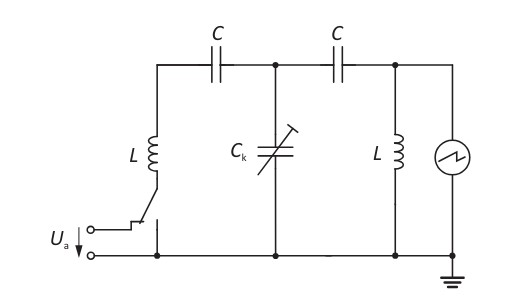

<IPython.core.display.Latex object>

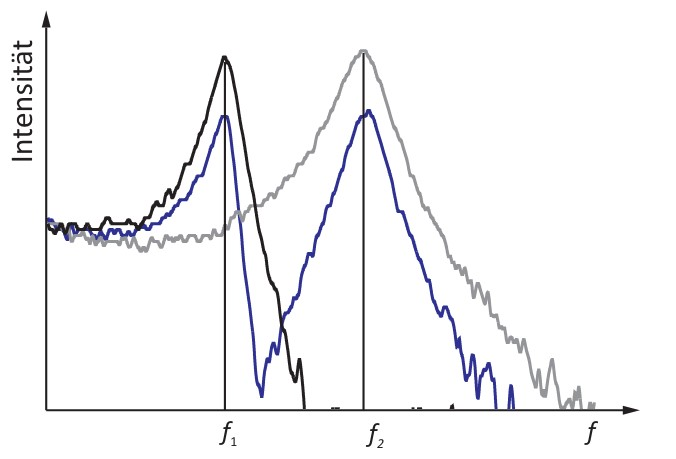

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/Low.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.1$: Low-Point Circuit [1]'))

dy(Im("./img/peak.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.2$: Frequency Spectra: Beat Oscillation (Blue Curve) [1]'))

In task 1, a low-point resonant circuit is set up which produces beats. **Fig 1.1**.

A beat has an in-phase-oscillation $f_1$ and out-of-phase oscillation $f_2$ frequency, which depends on the total capacitance $C$ and $C_k$ **Fig 1.2**.

The values of $f_1$ and $f_2$ are related by the coupling constant $k_{C,T}$ given by:

$$ k_{C,T} = \left| \frac{\omega_1^2 - \omega_2^2}{\omega_1^2 - \omega_2^2} \right| \label{eq1.1} \tag{1.1} $$

$$\omega_i = 2\pi f_i$$

- $\omega_1$ : In phase angular frequency
- $\omega_2$ : Out of phase angular frequency

Additionally, for a low-point circuit, the relationship between $k_{C,T}$, $C$ and $C_k$ is given by:

$$ k_{C,T} = \frac{C}{C+C_k}  $$

$$ \frac{1}{k_{C,T}}  = \frac{C_k}{C} + 1 \label{eq1.2} \tag{1.2} $$


- $C$ : Capacitance of Fixed Capacitor 
- $C_k$ : Capacitance of Coupling Capacitor
- $k_{C,T}$ : Coupling factor of low-point circuit

***Procedure*** 

1. The circuit was set up following the circuit diagram  **Fig 1.1**, and the value of $C_k$ is varied using a capacitor decade.
<br>

2. The corresponding time trace and frequency spectrum was recorded using [PicoScope 7 software](https://www.picotech.com/products/picoscope-7-software) installed on a host connected to the PicoScope 2000.
<br>

3. Subsequently, the frequencies $f_1$ and $f_2$ were determined by analyzing the peaks in the frequency spectra **Fig 1.2**. 
</br> 

4. The value of $k_{ct}$ was calculated using Eq [1.1](#mjx-eqn-eq1.1). 
<br>

5. The process was repeated for 10 values of $C_k$
<br>

6. Linear regression was performed using the values of $C_k$, $k_{ct}$ and fitting function [1.2](#mjx-eqn-eq1.2).
<br>

7. Finally, the value of $C$ is determined from the fit.

In [47]:
# Data Preprocessing
task_dir = data_dir + 'Task1/csv/'
C_k_l = [] # Capacitance in pF
df_l = []

for path in os.listdir(task_dir):
    s = re.findall('.*pF', path)[0] #Find all files with pF ending
    #C_k_str_l.append(s) #Append s to C_k_str_list
    r = float(s[:-2]) #Slice last 2 elements and convert to float
    C_k_l.append(r) # pF floats
    df = pd.read_csv(task_dir + path, delimiter=',', skiprows=1, dtype=np.float64, decimal='.')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)
    
sorted_lists = sorted(zip(C_k_l, df_l))
C_k_l, df_l = zip(*sorted_lists)

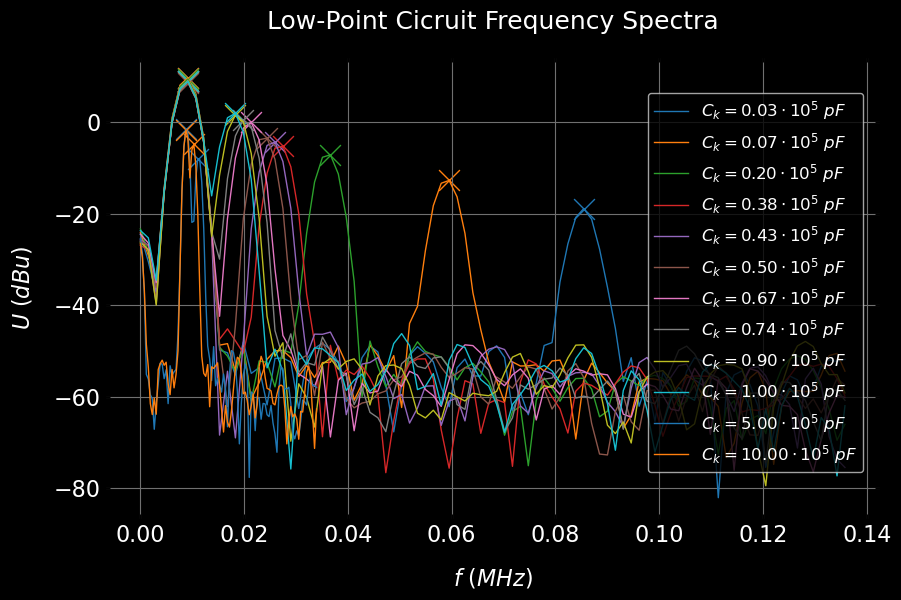

<IPython.core.display.Latex object>

In [51]:
f_in_l = [] # in MHz
f_out_l = [] # in MHz
w_in_l = [] # in MHz
w_out_l = [] # in MHz
for i in range(len(C_k_l)):
    
    label_s = r'$C_k = %.2f \cdot 10^5 ~pF$' % (C_k_l[i]*1e-5)
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    peaks, _ = find_peaks(y[:80], height=-40)
    
    #Appending frequencies corresponding to peaks
    f_in_l.append(x[peaks][0]) #MHz
    f_out_l.append(x[peaks][1]) #MHz
    w_in_l.append(x[peaks][0]*2*np.pi) #MHz
    w_out_l.append(x[peaks][1]*2*np.pi) #MHz
    
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:90], y[:90],label=label_s)
    
    

plt.title(r'Low-Point Cicruit Frequency Spectra')
plt.xlabel(r'$f$ ($MHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.2$: Frequency spectra plot of 12 measurements of low-point circuit.'))

In [6]:
def k_fit(c_k_arg, c_arg):
    return c_arg/(c_k_arg+c_arg)

w_in_arr = np.array(w_in_l) #MHz #Correct
w_out_arr = np.array(w_out_l) #MHz #Correct
k_l_arr = abs((w_in_arr**2 - w_out_arr**2)/(w_out_arr**2 + w_in_arr**2)) #Correct

#Fitting
fit = curve_fit(k_fit, np.array(C_k_l), k_l_arr)
C = fit[0] #in pF
u_C = np.sqrt(fit[1][0][0])
dy(Lx(r'$C = (%.2f \pm %.3f) ~\mu F$' % (C*1e-6, u_C*1e-6)))

<IPython.core.display.Latex object>

## Task 2

***Task Definition*** 

- Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance $C_k$ values.

- Plot the ten frequency spectra into one graph. 

- Determine the frequencies of the in-phase $f_+$ and out-of-phase $f_-$ oscillation modes.

- Calculate the coupling factors $k_{C,H}$ from the measured frequencies. 

- Fit the theoretical expressions to the data to determine the value of the capacitance $C$.

***Theoretical Basis*** 


***Procedure***


## Task 4

***Task Definition*** 

Measure the coupling factor $k_L$ for two inductively coupled resonant circuits as a function of the distance $d$ between the inductance coils. 
Plot the frequency spectra in one graph. 
Plot the coupling factor as a function of distance and analyze the distance dependence.

***Theoretical Basis***

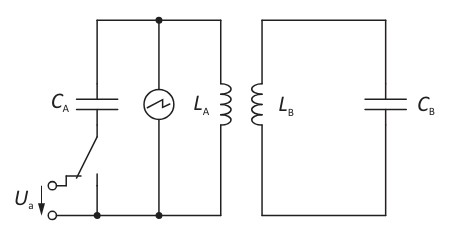

<IPython.core.display.Latex object>

In [7]:
dy(Im("./img/Reso.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 4.1$: Coupled Resonant Circuit [1]'))

In task 4, a coupled resonant circuit is set up which produces beats similar to those in previous tasks. **Fig 4.1**.

The following conditions were imposed during the experiment: 

- $C_A = C_B = C $ 

- $L_A = L_B= 2mH $

Under such conditions, the coupling factor $k_L$ and mutual inductance $M$ are given by:

$$ \omega_1 = \frac{\omega_0}{\sqrt{1+k_L}}$$

$$ k_L = \frac{\omega_0^2}{\omega_1^2} -1 \tag{4.1} $$

$$ M = k_L * L \tag{4.2} $$

- $\omega_0 = 54.8 kHz $ (Uncoupled angular freq measured during experiment)
- $\omega_1$ : In phase angular frequency
- k_L : Coupling factor of Resonant Circuit 
- $M$ : Mutual Inductance


***Procedure***

1. The circuit was set up following the circuit diagram  **Fig 4.1**, and the distance $d$ between inductance coils $L_1$ and $L_2$ was recorded.
<br>

2. The corresponding frequency spectrum was recorded using [PicoScope 7 software](https://www.picotech.com/products/picoscope-7-software) installed on a host connected to the PicoScope 2000.
<br>

3. Subsequently, the frequency $f_1$ is determined by analyzing the peaks in the frequency spectra **Fig 1.2**. 
</br> 

4. The values of $k_{L}$ and $M$ are calculated using Eq [4.1](#mjx-eqn-eq1.1) and Eq [4.2](#mjx-eqn-eq1.1) respectively.
<br>

5. The process was repeated for 8 values of $d$, and a graph of $M(d)$ is plotted.
<br>

6. This graph is fitted to a power law.
<br>

In [8]:
# Data Preprocessing
task_dir = data_dir + 'Task4/csv/'
d_l = [] # Capacitance in pF
df_l = []

for path in os.listdir(task_dir):
    r = float(path[:-4]) #Slice last 4 elements and convert to float
    d_l.append(r) # cm floats
    df = pd.read_csv(task_dir + path, delimiter=',', skiprows=1, dtype=np.float64, decimal='.')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)

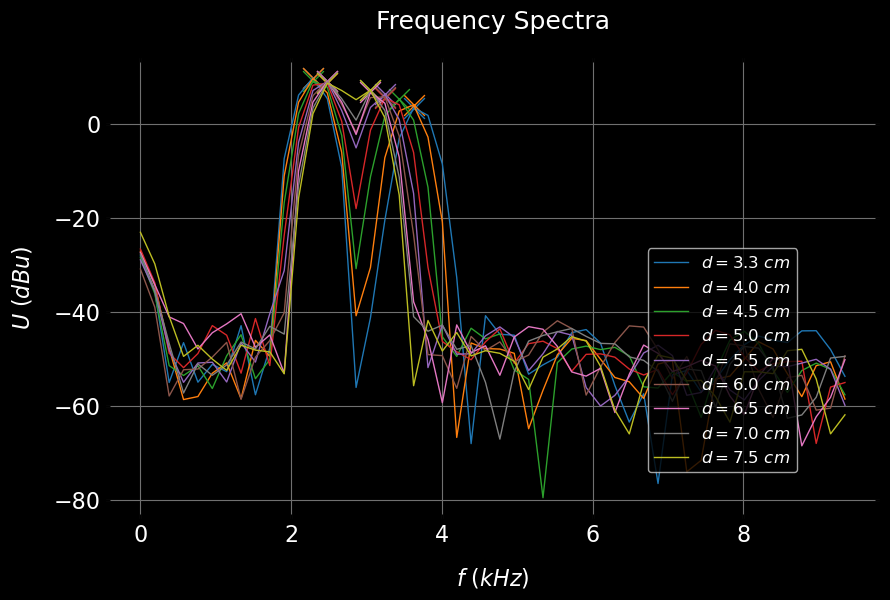

In [9]:
f_in_l = [] # in kHz
f_out_l = [] # in kHz
w_in_l = [] # in rad * Hz
w_out_l = [] # in rad * Hz
for i in range(len(d_l)):
    
    label_s = r'$d = %.1f ~cm$' % (d_l[i])
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    
    peaks, _ = find_peaks(y[:80], height=-40)
    w_in_l.append(x[peaks][0]*1e3*2*np.pi)
    w_out_l.append(x[peaks][1]*1e3*2*np.pi)
    
 
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:50], y[:50], label=label_s)
    
plt.title(r'Frequency Spectra')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
#dy(Lx(r'$Figure\, 2.1$: Frequency spectra plot of ten measurements of high-point circuit.')

In [17]:
L = 17.2e-3 #H
w_0 = 1/np.sqrt(L*C*1e-12) #rad Hz
w_in_arr = np.array(w_in_l)
w_out_arr = np.array(w_out_l)
f_0 = w_0/2/np.pi

[3164.71049876]


In [18]:
def power_fit(d_arg,A,B):
    return A+B/np.sqrt((A+d_arg**2)**3)

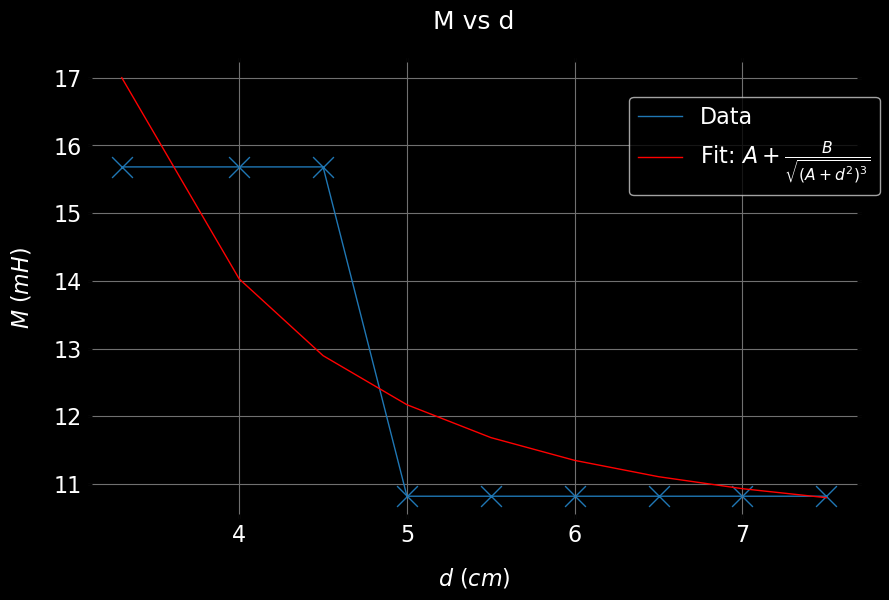

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [38]:
M = L*(w_0**2/w_in_arr**2-1)

#Fitting
fit = curve_fit(power_fit,np.array(d_l),M)
A = fit[0][0] 
B = fit[0][1]
u_A = np.sqrt(fit[1][0][0])
u_B = np.sqrt(fit[1][1][1])


#Plotting
plt.scatter(d_l, M*1e3, marker='x')
plt.plot(d_l, M*1e3, label='Data')
plt.plot(d_l, power_fit(np.array(d_l),A,B)*1e3, label= r'Fit: $A+\frac{B}{\sqrt{(A+d^2)^3}}$',color='r')

plt.title(r'M vs d')
plt.xlabel(r'$d$ ($cm$)')
plt.ylabel(r'$M$ ($mH$)')
plt.legend(loc=(0.7,0.7), fontsize= 16)
plt.grid(True)
plt.show()

dy(Lx(r'$A = (%.2f \pm %.3f) ~mH$' % (A*1e3, u_A*1e3)))
dy(Lx(r'$B = %.2f \pm %.3f $' % (B*1e3, u_B*1e3)))

## References

1) [E17e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621566/mod_resource/content/1/E17e_2024.pdf)